##匯入資料
匯入 train.csv , test.csv

In [0]:
import pandas as pd
import numpy as np
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

##資料前處理
我有試過都不做任何前處理下去跑，結果是預測出來的值都長一樣

所以我把所有的值都NORMALIZE過後預測出來的值就開始有了起伏

我有用UPDOWN_LIST去記明天是漲還是跌，如果是漲的話就是1，跌的話就是0。

TESTUPDOWN_LIST也是做一樣的事，不過是記TEST DATA的

TRAIN_X是除了DATE以外所有NORMALIZE過的值

TRAIN_Y是沒有NORMALIZE過的CLOSE PRICE

In [0]:
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
train_y = train_df[['Close Price']]
train_x = train_df[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
test_y = test_df[['Close Price']]
test_x = test_df[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
updown_list = []
testupdown_list = []
for i in range(2263):
  if train_y.iloc[i+1,0] - train_y.iloc[i,0] > 0:
    updown_list.append(1)
  else:
    updown_list.append(0)
for i in range(251):
  if test_y.iloc[i+1,0] - test_y.iloc[i,0] > 0:
    testupdown_list.append(1)
  else:
    testupdown_list.append(0)
normalizer = StandardScaler()
open = train_x['Open Price'].to_numpy().reshape(-1, 1)
normalizer.fit(open)
train_x['Open Price'] = normalizer.transform(open)
close = train_x['Close Price'].to_numpy().reshape(-1, 1)
normalizer.fit(close)
train_x['Close Price'] = normalizer.transform(close)
high = train_x['High Price'].to_numpy().reshape(-1, 1)
normalizer.fit(high)
train_x['High Price'] = normalizer.transform(high)
low = train_x['Low Price'].to_numpy().reshape(-1, 1)
normalizer.fit(low)
train_x['Low Price'] = normalizer.transform(low)
volume = train_x['Volume'].to_numpy().reshape(-1, 1)
normalizer.fit(volume)
train_x['Volume'] = normalizer.transform(volume)
open = test_x['Open Price'].to_numpy().reshape(-1, 1)
normalizer.fit(open)
test_x['Open Price'] = normalizer.transform(open)
close = test_x['Close Price'].to_numpy().reshape(-1, 1)
normalizer.fit(close)
test_x['Close Price'] = normalizer.transform(close)
high = test_x['High Price'].to_numpy().reshape(-1, 1)
normalizer.fit(high)
test_x['High Price'] = normalizer.transform(high)
low = test_x['Low Price'].to_numpy().reshape(-1, 1)
normalizer.fit(low)
test_x['Low Price'] = normalizer.transform(low)
volume = test_x['Volume'].to_numpy().reshape(-1, 1)
normalizer.fit(volume)
test_x['Volume'] = normalizer.transform(volume)
clear_output()

##LOGESTIC REGRESSION

這裡我有用兩個方式去預測明天是漲還是跌:

(1)去預測隔天的CLOSE PRICE然後再跟當天的CLOSE PRICE相減看是漲還是跌

(2)直接預測明天是漲還是跌


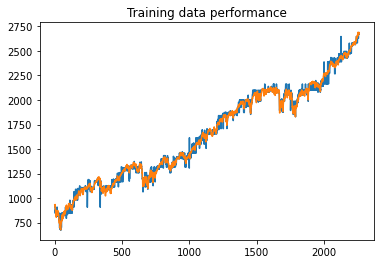

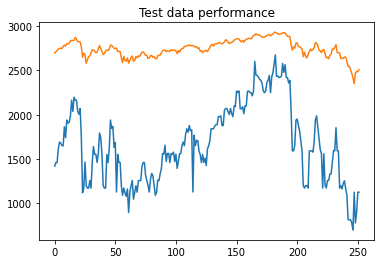

0.5223155103844455
0.47808764940239046


In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
model = LogisticRegression(penalty='none',solver = 'lbfgs',max_iter=100,random_state=1012)
model.fit(train_x, train_y.astype('int'))
train_pred = model.predict(train_x) 
test_pred =  model.predict(test_x)
plt.plot(range(2264), train_pred)
plt.plot(range(2264),train_y)
plt.title('Training data performance')
clear_output()
plt.show()
plt.show()
plt.plot(range(252), test_pred)
plt.plot(range(252),test_y)
plt.title('Test data performance')
plt.show()
train_list = []
test_list = []
for i in range(2263):
  if train_pred[i] - train_y.iloc[i,0] > 0:
    train_list.append(1)
  else:
    train_list.append(0)
for i in range(251):
  if test_pred[i] - test_y.iloc[i,0] > 0:
    test_list.append(1)
  else:
    test_list.append(0)
train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                            train_list)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_list)
print(train_acc)
print(test_acc)

上方的圖是我用方法一和

LogisticRegression(penalty='none',solver = 'lbfgs',max_iter=100,random_state=1012)去做預測的結果

橘色是正確答案藍色是預測的

ACCURCYRATE TRAIN = 0.5223155103844455

ACCURCYRATE TEST = 0.47808764940239046

這個在我所條的參數中他的CLOSE PRICE 的 PREDICT 是最貼近原本的
但是算漲跌時的ACCURACY卻不是最好的

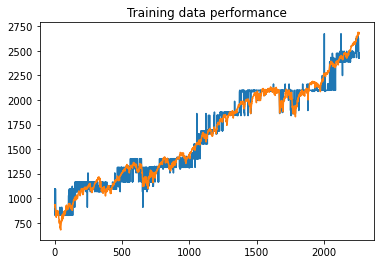

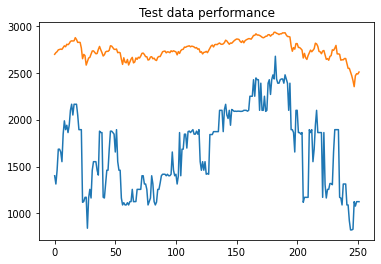

0.517454706142289
0.47808764940239046


In [0]:
model = LogisticRegression(penalty='none',solver = 'sag',max_iter=100,random_state=1012)
model.fit(train_x, train_y.astype('int'))
train_pred = model.predict(train_x)  
test_pred =  model.predict(test_x)
plt.plot(range(2264), train_pred)
plt.plot(range(2264),train_y)
plt.title('Training data performance')
clear_output()
plt.show()
plt.show()
plt.plot(range(252), test_pred)
plt.plot(range(252),test_y)
plt.title('Test data performance')
plt.show()
train_list = []
test_list = []
for i in range(2263):
  if train_pred[i] - train_y.iloc[i,0] > 0:
    train_list.append(1)
  else:
    train_list.append(0)
for i in range(251):
  if test_pred[i] - test_y.iloc[i,0] > 0:
    test_list.append(1)
  else:
    test_list.append(0)
train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                            train_list)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_list)
print(train_acc)
print(test_acc)

上方的圖是我用方法一和

LogisticRegression(penalty='none',solver = 'sag',max_iter=100,random_state=1012)去做預測的結果

橘色是正確答案藍色是預測的

ACCURCYRATE TRAIN = 0.517454706142289

ACCURCYRATE TEST = 0.47808764940239046


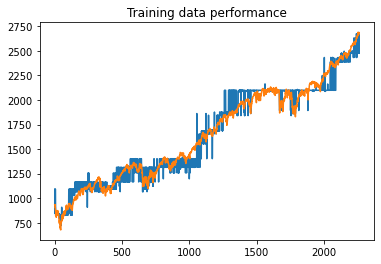

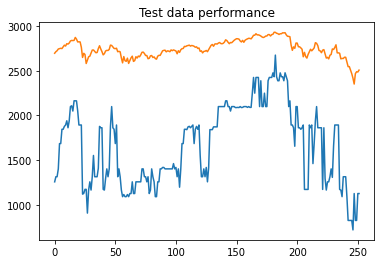

0.521873619089704
0.47808764940239046


In [0]:
model = LogisticRegression(penalty='l2',solver = 'newton-cg',max_iter=100,C=6.0,random_state=1012)
model.fit(train_x, train_y.astype('int'))
train_pred = model.predict(train_x) 
test_pred =  model.predict(test_x)
plt.plot(range(2264), train_pred)
plt.plot(range(2264),train_y)
plt.title('Training data performance')
clear_output()
plt.show()
plt.plot(range(252), test_pred)
plt.plot(range(252),test_y)
plt.title('Test data performance')
plt.show()
train_list = []
test_list = []
for i in range(2263):
  if train_pred[i] - train_y.iloc[i,0] > 0:
    train_list.append(1)
  else:
    train_list.append(0)
for i in range(251):
  if test_pred[i] - test_y.iloc[i,0] > 0:
    test_list.append(1)
  else:
    test_list.append(0)
train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                            train_list)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_list)
print(train_acc)
print(test_acc)

上方的圖是我用方法一和

LogisticRegression(penalty='l2',solver = 'newton-cg',max_iter=100,C=6.0,random_state=1012)去做預測的結果

橘色是正確答案藍色是預測的

ACCURCYRATE TRAIN = 0.517454706142289

ACCURCYRATE TEST = 0.47808764940239046

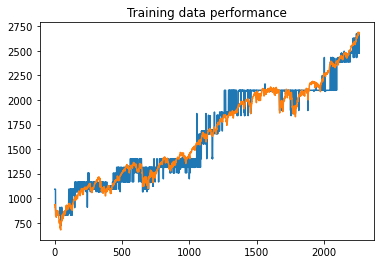

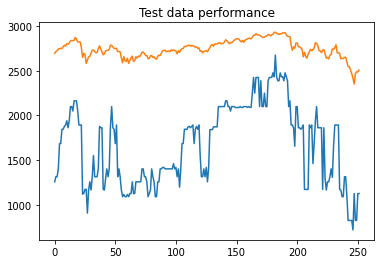

0.518338488731772
0.47808764940239046


In [34]:
import matplotlib.pyplot as plt
model = LogisticRegression(penalty='l2',solver = 'lbfgs',max_iter=100,C=6.0,random_state=1012)
model.fit(train_x, train_y.astype('int'))
train_pred = model.predict(train_x) 
test_pred =  model.predict(test_x)
plt.plot(range(2264), train_pred)
plt.plot(range(2264),train_y)
plt.title('Training data performance')
clear_output()
plt.show()
plt.plot(range(252), test_pred)
plt.plot(range(252),test_y)
plt.title('Test data performance')
plt.show()
train_list = []
test_list = []
for i in range(2263):
  if train_pred[i] - train_y.iloc[i,0] > 0:
    train_list.append(1)
  else:
    train_list.append(0)
for i in range(251):
  if test_pred[i] - test_y.iloc[i,0] > 0:
    test_list.append(1)
  else:
    test_list.append(0)
train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                            train_list)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_list)
print(train_acc)
print(test_acc)

上方的圖是我用方法一和

LogisticRegression(penalty='l2',solver = 'newton-cg',max_iter=100,C=6.0,random_state=1012)去做預測的結果

橘色是正確答案藍色是預測的

ACCURCYRATE TRAIN = 0.518338488731772

ACCURCYRATE TEST = 0.47808764940239046

In [32]:
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(penalty='none',solver = 'lbfgs',max_iter=100,random_state=1012)
model.fit(train_x.drop(index=2263), updown_list)
train_pred = model.predict(train_x.drop(index=2263)) 
test_pred =  model.predict(test_x.drop(index=251))
print(*train_pred)
#plt.plot(range(2263), train_pred)
#plt.plot(range(2263), train_y.drop(index=0))
#plt.title('Training data performance')
#plt.show()
#plt.plot(range(251), test_pred)
#plt.plot(range(251),test_y.drop(index=0))
#plt.title('Test data performance')
#plt.show()
#train_list = []
#test_list = []
#for i in range(2263):
#  if train_pred[i] - train_y.iloc[i,0] > 0:
#    train_list.append(1)
#  else:
#    train_list.append(0)
#for i in range(251):
#  if test_pred[i] - test_y.iloc[i,0] > 0:
#    test_list.append(1)
#  else:
#    test_list.append(0)

train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                               train_pred)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_pred)
print(train_acc)
print(test_acc)

0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

上方的圖是我用方法二和

LogisticRegression(penalty='none',solver = 'lbfgs',max_iter=100,random_state=1012)去做預測的結果

橘色是正確答案藍色是預測的

ACCURCYRATE TRAIN = 0.5461776403004861

ACCURCYRATE TEST = 0.46215139442231074

##LOGESTIC REGRESSION結論

在這個模型中我嘗試調了三個參數，分別是Penalty,solver和C

我發現當penalty=none時做出來的Close Price會跟原本的圖比較貼近但accurcy卻沒有很好，而當有penalty時他痕容易跑出全猜一的結果

而slover我有分別是過lbfgs newtown-cg 還有sag我認為跑出來的圖最好看的是lbfgs

我認為我在這個模型跑出來最好的accuracy是用方法一和
LogisticRegression(penalty='none',solver = 'lbfgs',max_iter=100,random_state=1012)所跑出來的

ACCURCYRATE TRAIN = 0.5223155103844455

ACCURCYRATE TEST = 0.47808764940239046

##OTHER CLASSIFIER-RandomForestClassifier

這裡我直接預測明天是漲還是跌

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1012)
model.fit(train_x.drop(index=2263), updown_list)
train_pred = model.predict(train_x.drop(index=2263)) 
test_pred =  model.predict(test_x.drop(index=251))
train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                               train_pred)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_pred)
print(train_acc)
print(test_acc)

1.0
0.4581673306772908


我一開始直接沒調任何參數跑跑看

結果OVERFITTING了

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=1,random_state=1012)
model.fit(train_x.drop(index=2263), updown_list)
train_pred = model.predict(train_x.drop(index=2263)) 
test_pred =  model.predict(test_x.drop(index=251))
train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                               train_pred)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_pred)
print(train_acc)
print(test_acc)

0.550596553247901
0.5139442231075697


我試著去調MAXDEPTH發現MAXDEPTH越小OVERFITTING就越不嚴重，於是我把MAXDEPTH=1


ACCURCYRATE TRAIN = 0.550596553247901

ACCURCYRATE TEST = 0.5139442231075697

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=1,n_estimators=2,warm_start = True,random_state=1012)
model.fit(train_x.drop(index=2263), updown_list)
train_pred = model.predict(train_x.drop(index=2263)) 
test_pred =  model.predict(test_x.drop(index=251))
train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                               train_pred)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_pred)
print(train_acc)
print(test_acc)

0.5444100751215201
0.5179282868525896


接著我試著去n_estimators 跟 WARM_START我發現把WARM_START設為TRUE時比FALSE好

ACCURCYRATE TRAIN = 0.5444100751215201

ACCURCYRATE TEST = 0.5179282868525896

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2,n_estimators=2,warm_start = True,random_state=1012)
model.fit(train_x.drop(index=2263), updown_list)
train_pred = model.predict(train_x.drop(index=2263)) 
test_pred =  model.predict(test_x.drop(index=251))
train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                               train_pred)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_pred)
print(train_acc)
print(test_acc)

0.5634114007954043
0.5099601593625498


接著我試著去讓MAXDEPTH增加但TEST ACCURACY下降了
ACCURCYRATE TRAIN = 0.5634114007954043

ACCURCYRATE TEST = 0.5099601593625498

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=1,n_estimators=1,warm_start = True,random_state=1012)
model.fit(train_x.drop(index=2263), updown_list)
train_pred = model.predict(train_x.drop(index=2263)) 
test_pred =  model.predict(test_x.drop(index=251))
train_acc = accuracy_score(updown_list,         # 計算訓練資料準確度
                               train_pred)
test_acc = accuracy_score(testupdown_list,         # 計算訓練資料準確度
                               test_pred)
print(train_acc)
print(test_acc)

0.5461776403004861
0.549800796812749


最後我發現把n_estimators下降的話TEST ACCURACY會跑得比較好

ACCURCYRATE TRAIN = 0.5461776403004861

ACCURCYRATE TEST = 0.549800796812749

##RandomForestClassifier結論

在這個模型中我嘗試調了三個參數，分別是max_depth,n_estimators和warm_start

我在這裡是一個一個參數慢慢調發現那個參數調成怎樣會最好之後再換另一個參數

在這裡我得到最好的ACCURACY是用RandomForestClassifier(max_depth=1,n_estimators=1,warm_start = True,random_state=1012)跑出來的

ACCURCYRATE TRAIN = 0.5461776403004861

ACCURCYRATE TEST = 0.549800796812749

##NEURAL NETWORK
這裡我直接預測明天是漲還是跌

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import  Adam
from keras.optimizers import  Adamax
def build_model():
        #建立模型
        model = Sequential()
        #將模型疊起
        model.add(Dense(input_dim=5,units=1,activation='relu'))
        model.add(c)
        model.summary()
        return model
seed_value= 12321 
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)


這是我做實驗的第一個模型


這個模型只用了一層是Dense(input_dim=5,units=1,activation='relu')

In [169]:
model = build_model()
model.compile(loss='mean_squared_error',optimizer="adam",metrics=['accuracy'])
model.fit(train_x.drop(index=2263),updown_list,batch_size=200,epochs=10,shuffle=False)
score = model.evaluate(train_x.drop(index=2263),updown_list)
testscore = model.evaluate(test_x.drop(index=251),testupdown_list)
clear_output()
print ('Train Acc:', score[1])
print('\n')
print ('Test Acc:', testscore[1])
print('\n')

Train Acc: 0.5227574110031128


Test Acc: 0.5816733241081238




這裡我用了loss='mean_squared_error',optimizer="adam"去最佳化這個模型他跑出來的ACCURACY也比前面的CLASSIFIER好


ACCURCYRATE TRAIN = 0.5227574110031128

ACCURCYRATE TEST = 0.5816733241081238

In [0]:
def build_model():
        #建立模型
        model = Sequential()
        #將模型疊起
        model.add(Dense(input_dim=5,units=3,activation='relu'))
        model.add(Dense(units=2,activation='sigmoid'))
        model.add(Dense(units=1,activation='tanh'))
        model.summary()
        return model

這是我做實驗的第二個模型

這個模型疊了三層分別是Dense(input_dim=5,units=3,activation='relu')和Dense(units=2,activation='sigmoid')和Dense(units=1,activation='tanh')

In [187]:
model = build_model()
model.compile(loss='mean_squared_error',optimizer="adam",metrics=['accuracy'])
model.fit(train_x.drop(index=2263),updown_list,batch_size=200,epochs=10,shuffle=False)
score = model.evaluate(train_x.drop(index=2263),updown_list)
testscore = model.evaluate(test_x.drop(index=251),testupdown_list)
clear_output()
print(*model.predict_classes(train_x.drop(index=2263)))
print ('Train Acc:', score[1])
print('\n')
print ('Test Acc:', testscore[1])
print('\n')

[1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] 

這裡我用了loss='mean_squared_error',optimizer="adam"去最佳化這個模型他跑出來的ACCURACY也比前面的MODEL好


ACCURCYRATE TRAIN = 0.5329208970069885

ACCURCYRATE TEST = 0.5896414518356323

In [193]:
model = build_model()
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit(train_x.drop(index=2263),updown_list,batch_size=200,epochs=10,shuffle=False)
score = model.evaluate(train_x.drop(index=2263),updown_list)
testscore = model.evaluate(test_x.drop(index=251),testupdown_list)
clear_output()
print(*model.predict_classes(train_x.drop(index=2263)))
print ('Train Acc:', score[1])
print('\n')
print ('Test Acc:', testscore[1])
print('\n')

[0] [1] [1] [0] [1] [0] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [0] [1] [1] [0] [0] [1] [1] [0] [1] [1] [1] [0] [1] [1] [0] [0] [0] [0] [0] [0] [1] [0] [0] [0] [0] [1] [1] [1] [1] [1] [0] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [0] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [0] [1] [0] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [0] [1] [0] [1] [1] [0] [0] [0] [0] [0] [0] [1] [0] [1] [1] [0] [1] [0] [0] [0] [1] [1] [1] [1] [1] [0] [0] [0] [0] [0] [0] 

這裡我改用了loss='binary_crossentropy',optimizer="adam"去最佳化這個模型但他跑出來的ACCURACY卻比前面的差


ACCURCYRATE TRAIN = 0.5280600786209106

ACCURCYRATE TEST = 0.4900398552417755

In [198]:
model = build_model()
model.compile(loss='mean_squared_error',optimizer="adamax",metrics=['accuracy'])
model.fit(train_x.drop(index=2263),updown_list,batch_size=200,epochs=10,shuffle=False)
score = model.evaluate(train_x.drop(index=2263),updown_list)
testscore = model.evaluate(test_x.drop(index=251),testupdown_list)
clear_output()
print(*model.predict_classes(train_x.drop(index=2263)))
print ('Train Acc:', score[1])
print('\n')
print ('Test Acc:', testscore[1])
print('\n')

[0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [0] [0] [0] [0] [0] [0] [0] [0] [1] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [0] [1] [0] [1] [1] [1] [0] [0] [0] [0] [0] [1] [1] [1] [1] [1] [1] 

這裡我用了loss='mean_squared_error',optimizer="adamax"去最佳化這個模型他跑出來的ACCURACY比loss='binary_crossentropy',optimizer="adam"的好一些


ACCURCYRATE TRAIN = 0.524966835975647

ACCURCYRATE TEST = 0.5099601745605469

In [201]:
model = build_model()
model.compile(loss='binary_crossentropy',optimizer="adamax",metrics=['accuracy'])
model.fit(train_x.drop(index=2263),updown_list,batch_size=200,epochs=10,shuffle=False)
score = model.evaluate(train_x.drop(index=2263),updown_list)
testscore = model.evaluate(test_x.drop(index=251),testupdown_list)
clear_output()
print(*model.predict_classes(train_x.drop(index=2263)))
print ('Train Acc:', score[1])
print('\n')
print ('Test Acc:', testscore[1])
print('\n')

[1] [0] [0] [1] [1] [1] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [0] [1] [1] [1] [1] [0] [1] [1] [1] [0] [1] [0] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [0] [1] [1] [1] [0] [0] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [0] [1] [1] [1] [1] [1] [0] [0] [1] [1] [1] [1] [1] [1] [1] [0] [0] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [0] [1] [0] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [0] [1] [1] [1] [1] [1] [1] 

這裡我用了loss='binary_crossentropy',optimizer="adamax"去最佳化這個模型他跑出來的ACCURACY比上一個又好上不少


ACCURCYRATE TRAIN = 0.5404330492019653

ACCURCYRATE TEST = 0.525896430015564

In [0]:
def build_model():
        #建立模型
        model = Sequential()
        #將模型疊起
        model.add(Dense(input_dim=5,units=3,activation='relu'))
        model.add(Dense(units=2,activation='relu'))
        model.add(Dense(units=1,activation='relu'))
        model.add(Dense(units=1,activation='relu'))
        model.summary()
        return model

這是我做實驗的第三個模型

這個模型疊了四層分別是Dense(input_dim=5,units=3,activation='relu')和Dense(units=2,activation='relu')和Dense(units=1,activation='relu')和Dense(units=1,activation='relu')

In [227]:
model = build_model()
model.compile(loss='binary_crossentropy',optimizer="adamax",metrics=['accuracy'])
model.fit(train_x.drop(index=2263),updown_list,batch_size=200,epochs=10,shuffle=True)
score = model.evaluate(train_x.drop(index=2263),updown_list)
testscore = model.evaluate(test_x.drop(index=251),testupdown_list)
clear_output()
print(*model.predict_classes(train_x.drop(index=2263)))
print ('Train Acc:', score[1])
print('\n')
print ('Test Acc:', testscore[1])
print('\n')

[1] [0] [0] [1] [1] [1] [1] [1] [1] [0] [0] [0] [0] [0] [0] [0] [1] [0] [1] [1] [1] [0] [0] [0] [0] [1] [0] [0] [0] [1] [0] [1] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [0] [0] [0] [0] [0] [0] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [0] [0] [0] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [0] [0] [0] [0] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [1] [0] [0] [1] [1] [1] [0] [1] [0] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [0] [1] [0] [1] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [1] [1] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [0] [0] [0] [1] [1] [0] [0] [0] [0] [1] [0] [1] [0] [1] [1] [1] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [0] [1] [1] [1] [1] [1] [1] [0] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [1] [0] [0] [1] [0] [1] [1] [1] [0] [0] [0] [0] [0] [1] [1] [1] [1] [1] [1] 

這裡我用了loss='binary_crossentropy',optimizer="adamax"去最佳化這個模型

ACCURCYRATE TRAIN = 0.49270880222320557

ACCURCYRATE TEST = 0.5179283022880554

##NEURAL NETWORK結論
在neural network 的實驗中我試著去調model疊的層數和裡面的units和activation，在model.compile裡我則是調了loss跟optimizer

在這幾次實驗裡我得到最好的accuracy是用第二個模型跟loss='mean_squared_error',optimizer="adam"所得到的

ACCURCYRATE TRAIN = 0.5329208970069885

ACCURCYRATE TEST = 0.5896414518356323

##Dicussion
How did you preprocess the dataset?

我把所有的資料做 normalize 因為我試過用原本的資料做的話會全部都猜1

Which classifier reaches the highest classification accuracy in this dataset?

我認為是neural netwotk

why?

我覺得可能是因為他比較複雜所以跑出來的預測也會比較準 而且我跑出來的結果也是他比較準

Can this result remain if the dataset is different?

我認為很難 因為每次股市的漲幅狀況都不太一樣可能很像但只要有一個細微的不同就會造成結果反轉 而且看 train 跟 test 就知道只要資料稍微不同 accuracy 就會差很多

How did you improve your classifier?

我是把參數一個一個慢慢調然後看他的結果，但如果結果壞卻不一定是這個參數的問題。我會在多去調幾個參數，看在同樣情況下是不是這個參數在特定值得表現是比較壞的。如果是的話，我再去改動這個參數。我也試過很多組和，但沒有留在上面。留在上面的是我認為有比較大的改動和結果比較好的。